In [138]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# for data encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

## Import Data and Encode it

In [139]:
data = pd.read_csv('NIJ_s_Recidivism_Challenge_Training_Dataset.csv')

In [140]:
df = pd.DataFrame(data)

In [141]:
data.dtypes

ID                                                     int64
Gender                                                object
Race                                                  object
Age_at_Release                                        object
Residence_PUMA                                         int64
Gang_Affiliated                                       object
Supervision_Risk_Score_First                         float64
Supervision_Level_First                               object
Education_Level                                       object
Dependents                                            object
Prison_Offense                                        object
Prison_Years                                          object
Prior_Arrest_Episodes_Felony                          object
Prior_Arrest_Episodes_Misd                            object
Prior_Arrest_Episodes_Violent                         object
Prior_Arrest_Episodes_Property                        object
Prior_Arrest_Episodes_Dr

In [142]:
##Label Encoder Needs Uniform Data Types so switching all Categorical Columns to String
df = df.astype({'ID': int,
                'Gender': str,
               'Race': str,
               'Age_at_Release': str,
                'Residence_PUMA': int,
                'Gang_Affiliated': str,
                'Supervision_Risk_Score_First': float,
               'Supervision_Level_First': str,
               'Education_Level': str,
               'Dependents': str,
               'Prison_Offense': str,
               'Prison_Years': str,
               'Prior_Arrest_Episodes_Felony': str,
               'Prior_Arrest_Episodes_Misd': str,
               'Prior_Arrest_Episodes_Violent': str,
               'Prior_Arrest_Episodes_Property': str,
               'Prior_Arrest_Episodes_Drug': str,
               'Prior_Arrest_Episodes_PPViolationCharges': str,
               'Prior_Arrest_Episodes_DVCharges': str,
               'Prior_Arrest_Episodes_GunCharges': str,
               'Prior_Conviction_Episodes_Felony': str,
               'Prior_Conviction_Episodes_Misd': str,
               'Prior_Conviction_Episodes_Viol': str,
               'Prior_Conviction_Episodes_Prop': str,
               'Prior_Conviction_Episodes_Drug': str,
               'Prior_Conviction_Episodes_PPViolationCharges': str,
               'Prior_Conviction_Episodes_DomesticViolenceCharges': str,
               'Prior_Conviction_Episodes_GunCharges': str,
               'Prior_Revocations_Parole': str,
               'Prior_Revocations_Probation': str,
               'Condition_MH_SA': str,
               'Condition_Cog_Ed': str,
               'Condition_Other': str,
               'Violations_ElectronicMonitoring': str,
               'Violations_Instruction': str,
               'Violations_FailToReport': str,
               'Violations_MoveWithoutPermission': str,
               'Delinquency_Reports': str,
               'Program_Attendances': str,
               'Program_UnexcusedAbsences': str,
               'Residence_Changes': str,                
                'Avg_Days_per_DrugTest': float,
                'DrugTests_THC_Positive': float,
                'DrugTests_Cocaine_Positive': float,
                'DrugTests_Meth_Positive': float,
                'DrugTests_Other_Positive': float,
                'Percent_Days_Employed': float,
                'Jobs_Per_Year': float,                
               'Employment_Exempt': str,
               'Recidivism_Within_3years': str,
               'Recidivism_Arrest_Year1': str,
               'Recidivism_Arrest_Year2': str,
               'Recidivism_Arrest_Year3': str
               })

In [143]:
print(df.dtypes)

ID                                                     int32
Gender                                                object
Race                                                  object
Age_at_Release                                        object
Residence_PUMA                                         int32
Gang_Affiliated                                       object
Supervision_Risk_Score_First                         float64
Supervision_Level_First                               object
Education_Level                                       object
Dependents                                            object
Prison_Offense                                        object
Prison_Years                                          object
Prior_Arrest_Episodes_Felony                          object
Prior_Arrest_Episodes_Misd                            object
Prior_Arrest_Episodes_Violent                         object
Prior_Arrest_Episodes_Property                        object
Prior_Arrest_Episodes_Dr

In [144]:
le = LabelEncoder()

In [145]:
## Use Label Encoder to Encode Each Categorical Column Prior to One-Hot Encoding
df['Gender'] = le.fit_transform(df['Gender'])
df['Race'] = le.fit_transform(df['Race'])
df['Age_at_Release'] = le.fit_transform(df['Age_at_Release'])
df['Gang_Affiliated'] = le.fit_transform(df['Gang_Affiliated'])
df['Supervision_Level_First'] = le.fit_transform(df['Supervision_Level_First'])
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Prison_Offense'] = le.fit_transform(df['Prison_Offense'])
df['Prison_Years'] = le.fit_transform(df['Prison_Years'])
df['Prior_Arrest_Episodes_Felony'] = le.fit_transform(df['Prior_Arrest_Episodes_Felony'])
df['Prior_Arrest_Episodes_Misd'] = le.fit_transform(df['Prior_Arrest_Episodes_Misd'])
df['Prior_Arrest_Episodes_Violent'] = le.fit_transform(df['Prior_Arrest_Episodes_Violent'])
df['Prior_Arrest_Episodes_Property'] = le.fit_transform(df['Prior_Arrest_Episodes_Property'])
df['Prior_Arrest_Episodes_Drug'] = le.fit_transform(df['Prior_Arrest_Episodes_Drug'])
df['Prior_Arrest_Episodes_PPViolationCharges'] = le.fit_transform(df['Prior_Arrest_Episodes_PPViolationCharges'])
df['Prior_Arrest_Episodes_DVCharges'] = le.fit_transform(df['Prior_Arrest_Episodes_DVCharges'])
df['Prior_Arrest_Episodes_GunCharges'] = le.fit_transform(df['Prior_Arrest_Episodes_GunCharges'])
df['Prior_Conviction_Episodes_Felony'] = le.fit_transform(df['Prior_Conviction_Episodes_Felony'])
df['Prior_Conviction_Episodes_Misd'] = le.fit_transform(df['Prior_Conviction_Episodes_Misd'])
df['Prior_Conviction_Episodes_Viol'] = le.fit_transform(df['Prior_Conviction_Episodes_Viol'])
df['Prior_Conviction_Episodes_Prop'] = le.fit_transform(df['Prior_Conviction_Episodes_Prop'])
df['Prior_Conviction_Episodes_Drug'] = le.fit_transform(df['Prior_Conviction_Episodes_Drug'])
df['Prior_Conviction_Episodes_PPViolationCharges'] = le.fit_transform(df['Prior_Conviction_Episodes_PPViolationCharges'])
df['Prior_Conviction_Episodes_DomesticViolenceCharges'] = le.fit_transform(df['Prior_Conviction_Episodes_DomesticViolenceCharges'])
df['Prior_Conviction_Episodes_GunCharges'] = le.fit_transform(df['Prior_Conviction_Episodes_GunCharges'])
df['Prior_Revocations_Parole'] = le.fit_transform(df['Prior_Revocations_Parole'])
df['Prior_Revocations_Probation'] = le.fit_transform(df['Prior_Revocations_Probation'])
df['Condition_MH_SA'] = le.fit_transform(df['Condition_MH_SA'])
df['Condition_Cog_Ed'] = le.fit_transform(df['Condition_Cog_Ed'])
df['Condition_Other'] = le.fit_transform(df['Condition_Other'])
df['Violations_ElectronicMonitoring'] = le.fit_transform(df['Violations_ElectronicMonitoring'])
df['Violations_Instruction'] = le.fit_transform(df['Violations_Instruction'])
df['Violations_FailToReport'] = le.fit_transform(df['Violations_FailToReport'])
df['Violations_MoveWithoutPermission'] = le.fit_transform(df['Violations_MoveWithoutPermission'])
df['Delinquency_Reports'] = le.fit_transform(df['Delinquency_Reports'])
df['Program_Attendances'] = le.fit_transform(df['Program_Attendances'])
df['Program_UnexcusedAbsences'] = le.fit_transform(df['Program_UnexcusedAbsences'])
df['Residence_Changes'] = le.fit_transform(df['Residence_Changes'])
df['Employment_Exempt'] = le.fit_transform(df['Employment_Exempt'])
df['Recidivism_Within_3years'] = le.fit_transform(df['Recidivism_Within_3years'])
df['Recidivism_Arrest_Year1'] = le.fit_transform(df['Recidivism_Arrest_Year1'])
df['Recidivism_Arrest_Year2'] = le.fit_transform(df['Recidivism_Arrest_Year2'])
df['Recidivism_Arrest_Year3'] = le.fit_transform(df['Recidivism_Arrest_Year3'])

In [146]:
df.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,1,1,0,5,16,0,3.0,2,0,3,...,0.0,0.000000,0.0,0.488562,0.447610,0,0,0,0,0
1,2,1,0,3,16,0,6.0,1,2,1,...,0.0,0.000000,0.0,0.425234,2.000000,0,1,0,0,1
2,3,1,0,6,24,0,7.0,0,0,3,...,0.0,0.166667,0.0,0.000000,0.000000,0,1,0,1,0
3,4,1,1,4,16,0,7.0,0,2,1,...,0.0,0.000000,0.0,1.000000,0.718996,0,0,0,0,0
4,5,1,1,3,16,0,4.0,1,2,3,...,0.0,0.058824,0.0,0.203562,0.929389,0,1,1,0,0


In [147]:
print(df.dtypes)

ID                                                     int32
Gender                                                 int32
Race                                                   int32
Age_at_Release                                         int32
Residence_PUMA                                         int32
Gang_Affiliated                                        int32
Supervision_Risk_Score_First                         float64
Supervision_Level_First                                int32
Education_Level                                        int32
Dependents                                             int32
Prison_Offense                                         int32
Prison_Years                                           int32
Prior_Arrest_Episodes_Felony                           int32
Prior_Arrest_Episodes_Misd                             int32
Prior_Arrest_Episodes_Violent                          int32
Prior_Arrest_Episodes_Property                         int32
Prior_Arrest_Episodes_Dr

In [148]:
df.shape

(18028, 53)

In [ ]:
df.to_csv('Training_Data_Encoded.csv')

In [149]:
##Label Encoder Needs Uniform Data Types so switching all Categorical Columns to String
df = df.astype({
               'Recidivism_Within_3years': str,
               'Recidivism_Arrest_Year1': str,
               'Recidivism_Arrest_Year2': str,
               'Recidivism_Arrest_Year3': str
               })

In [150]:
df.dtypes

ID                                                     int32
Gender                                                 int32
Race                                                   int32
Age_at_Release                                         int32
Residence_PUMA                                         int32
Gang_Affiliated                                        int32
Supervision_Risk_Score_First                         float64
Supervision_Level_First                                int32
Education_Level                                        int32
Dependents                                             int32
Prison_Offense                                         int32
Prison_Years                                           int32
Prior_Arrest_Episodes_Felony                           int32
Prior_Arrest_Episodes_Misd                             int32
Prior_Arrest_Episodes_Violent                          int32
Prior_Arrest_Episodes_Property                         int32
Prior_Arrest_Episodes_Dr

In [151]:
df['Recidivism_Within_3years_Combined'] = df['Recidivism_Within_3years'].astype(str) + " " + df['Recidivism_Arrest_Year1'] + " " + df['Recidivism_Arrest_Year2'] + " " + df['Recidivism_Arrest_Year3']
df['Recidivism_Within_3years_Combined']

0        0 0 0 0
1        1 0 0 1
2        1 0 1 0
3        0 0 0 0
4        1 1 0 0
          ...   
18023    1 1 0 0
18024    1 0 1 0
18025    1 0 1 0
18026    0 0 0 0
18027    1 1 0 0
Name: Recidivism_Within_3years_Combined, Length: 18028, dtype: object

In [152]:
## Transforming Combined Column into Encoded Column and Others back
df['Recidivism_Within_3years'] = le.fit_transform(df['Recidivism_Within_3years'])
df['Recidivism_Arrest_Year1'] = le.fit_transform(df['Recidivism_Arrest_Year1'])
df['Recidivism_Arrest_Year2'] = le.fit_transform(df['Recidivism_Arrest_Year2'])
df['Recidivism_Arrest_Year3'] = le.fit_transform(df['Recidivism_Arrest_Year3'])
df['Recidivism_Within_3years_Combined'] = le.fit_transform(df['Recidivism_Within_3years_Combined'])

In [153]:
df.dtypes

ID                                                     int32
Gender                                                 int32
Race                                                   int32
Age_at_Release                                         int32
Residence_PUMA                                         int32
Gang_Affiliated                                        int32
Supervision_Risk_Score_First                         float64
Supervision_Level_First                                int32
Education_Level                                        int32
Dependents                                             int32
Prison_Offense                                         int32
Prison_Years                                           int32
Prior_Arrest_Episodes_Felony                           int32
Prior_Arrest_Episodes_Misd                             int32
Prior_Arrest_Episodes_Violent                          int32
Prior_Arrest_Episodes_Property                         int32
Prior_Arrest_Episodes_Dr

In [ ]:
df.drop(['Recidivism_Within_3years','Recidivism_Arrest_Year1','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3'], inplace=True, axis = 1)
df.to_csv('Training_Data_Encoded_v2.csv')

## Find Null Values and Treat Them

In [67]:
data = pd.read_csv('Training_Data_Encoded_v2.csv')

In [68]:
data.isnull().sum()

Unnamed: 0                                              0
ID                                                      0
Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                         0
Supervision_Risk_Score_First                          330
Supervision_Level_First                                 0
Education_Level                                         0
Dependents                                              0
Prison_Offense                                          0
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_E

In [69]:
##data = data.replace(to_replace= np.nan, value = 0)
data = data.fillna(0)

In [70]:
data.isnull().sum()

Unnamed: 0                                           0
ID                                                   0
Gender                                               0
Race                                                 0
Age_at_Release                                       0
Residence_PUMA                                       0
Gang_Affiliated                                      0
Supervision_Risk_Score_First                         0
Supervision_Level_First                              0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arre

## Tune HyperParameters for RandomForest Classifier

In [30]:
##Exhaustive Grid Search for Hyperparameter Tuning
n_estimators = [1600, 1800, 2000, 2200, 2400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

forest = RandomForestClassifier(random_state=1)

In [31]:
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 99.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 121.1min finished


In [34]:
gridF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1600}

## Specify Test/Train Split and Use Above  Parameters on the Dataset.

In [71]:
## Train and Test Split
X = data.drop(['Recidivism_Within_3years_Combined','Unnamed: 0','ID'],axis=1)
y = data['Recidivism_Within_3years_Combined']

In [72]:
print(X.shape, y.shape)

(18028, 48) (18028,)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12078, 48) (5950, 48) (12078,) (5950,)


In [74]:
modelone = RandomForestClassifier(n_estimators=1600,max_depth = 30, min_samples_leaf = 1, min_samples_split = 5)
modelone.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=1600)

In [75]:
## make predictions
yhat_one = modelone.predict(X_test)

In [76]:
acc = accuracy_score(y_test, yhat_one)
print('Accuracy: %.3f' % acc)

Accuracy: 0.570


<BarContainer object of 48 artists>

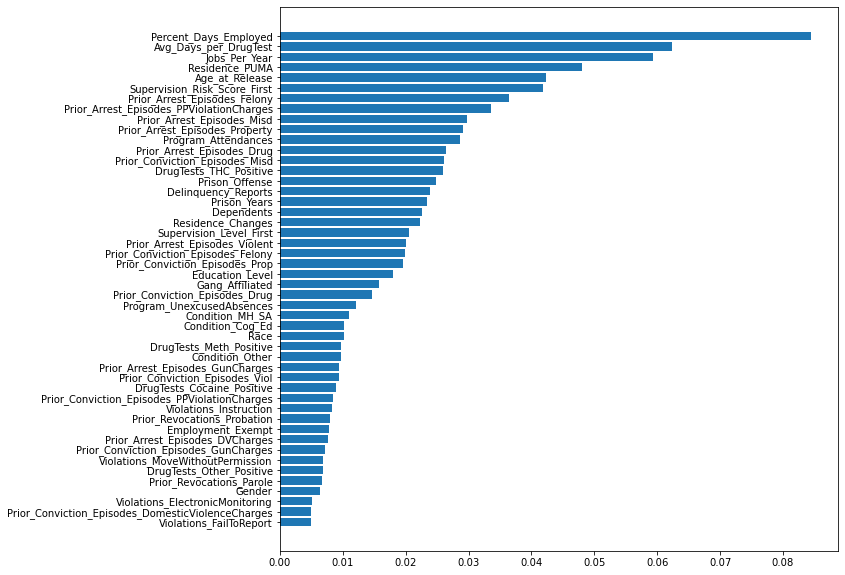

In [77]:
model_features=modelone.feature_importances_.argsort()
plt.figure(figsize=(10,10))
plt.barh(X.columns.values[model_features],modelone.feature_importances_[model_features])

## Add Column Back to Dataset that is Boolean: Either They Did or Did Not Recidivate. Use that as Target Variable.

In [88]:
data_two = pd.read_csv('Training_Data_Encoded_v2.csv')

In [89]:
##data = data.replace(to_replace= np.nan, value = 0)
data_two = data_two.fillna(0)

In [90]:
def recidivate_or_not (row):
    if row['Recidivism_Within_3years_Combined'] == 0:
        return 0
    return 1

In [91]:
data_two['Recidivate_or_Not'] = data_two.apply(lambda row: recidivate_or_not(row),axis=1)

In [92]:
data_two.head(5)

,Unnamed: 0,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,...,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years_Combined,Recidivate_or_Not
0,0,1,1,0,5,16,0,3.0,2,0,...,612.000000,0.000000,0.0,0.000000,0.0,0.488562,0.447610,0,0,0
1,1,2,1,0,3,16,0,6.0,1,2,...,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.000000,0,1,1
2,2,3,1,0,6,24,0,7.0,0,0,...,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.000000,0,2,1
3,3,4,1,1,4,16,0,7.0,0,2,...,25.400000,0.000000,0.0,0.000000,0.0,1.000000,0.718996,0,0,0
4,4,5,1,1,3,16,0,4.0,1,2,...,23.117647,0.000000,0.0,0.058824,0.0,0.203562,0.929389,0,3,1


In [93]:
## Train and Test Split
XX = data_two.drop(['Recidivism_Within_3years_Combined','Recidivate_or_Not','Unnamed: 0','ID'],axis=1)
yy = data_two['Recidivate_or_Not']

In [94]:
print(XX.shape, yy.shape)

(18028, 48) (18028,)


In [95]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.33, random_state=1)
print(XX_train.shape, XX_test.shape, yy_train.shape, yy_test.shape)

(12078, 48) (5950, 48) (12078,) (5950,)


In [96]:
## fit the model


model_two = RandomForestClassifier(n_estimators=1600,max_depth = 30, min_samples_leaf = 1, min_samples_split = 5)
model_two.fit(XX_train, yy_train)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=1600)

In [97]:
## make predictions
yhat_two = model_two.predict(XX_test)

In [98]:
## evaluate predictions
acc_two = accuracy_score(yy_test, yhat_two)
print('Accuracy: %.3f' % acc_two)

Accuracy: 0.728


<BarContainer object of 48 artists>

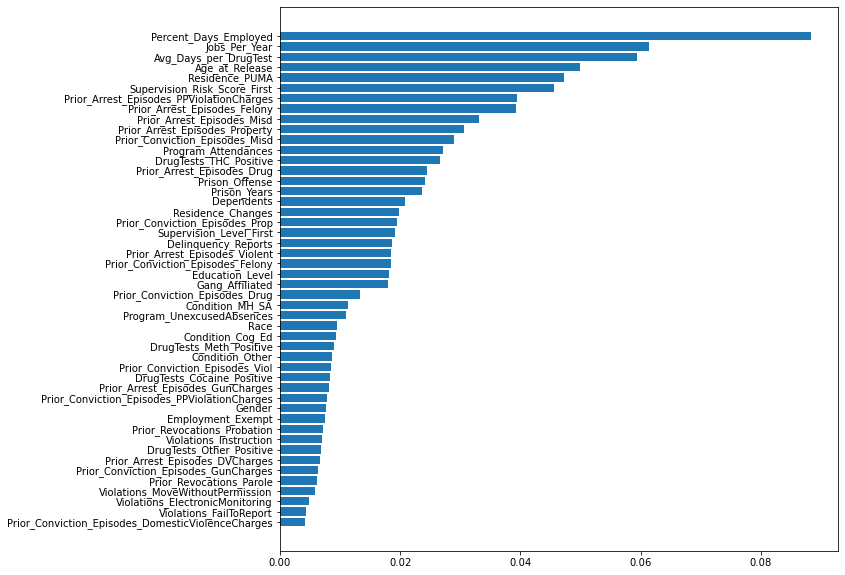

In [100]:
model_features=model_two.feature_importances_.argsort()
plt.figure(figsize=(10,10))
plt.barh(XX.columns.values[model_features],model_two.feature_importances_[model_features])

## Confusion Matrices

In [128]:
##Model with Target Variable Containing 4 Options
cm_one = confusion_matrix(y_test, yhat_one)

##Model with Target Variable As Boolean
cm_two = confusion_matrix(yy_test, yhat_two)

print(cm_one, cm_two)

[[2077    0   21  405]
 [ 401    0   12  188]
 [ 602    0   37  434]
 [ 482    0   11 1280]] [[1403 1100]
 [ 520 2927]]


Text(0.5, 1.0, 'Confusion Matrix - RF Classifier with Categorical Target Variable')

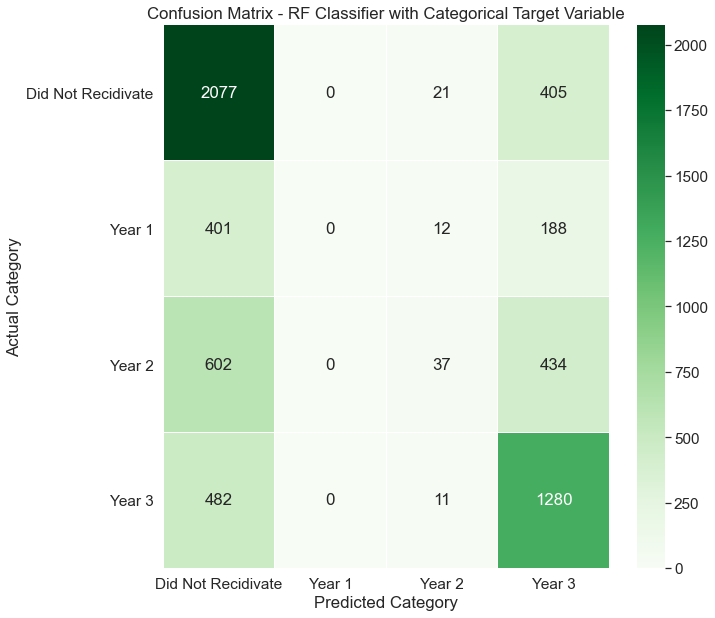

In [133]:
##Heatmap for Confusion Matrix One

##Get and reshape confusion matrix data
matrix_one = cm_one
matrix_one = matrix_one.astype('int') ##/ matrix_one.sum(axis=1)[:, np.newaxis]

##Build the Plot
plt.figure(figsize=(10,10))
sns.set(font_scale=1.4)
sns.heatmap(matrix_one, annot=True, cmap=plt.cm.Greens, linewidths=0.2, fmt='g')

##Add Labels to the Plot
class_names = ['Did Not Recidivate', 'Year 1', 'Year 2', 'Year 3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
tick_marks3 = tick_marks + 0.25
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix - RF Classifier with Categorical Target Variable')

Text(0.5, 1.0, 'Confusion Matrix - RF Classifier with Boolean Target Variable')

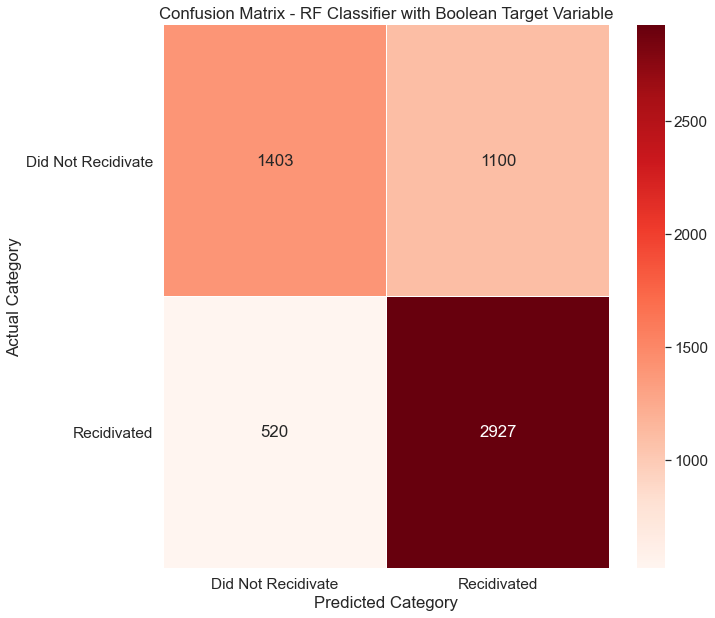

In [137]:
##Heatmap for Confusion Matrix Two

##Get a reshape confusion matrix data
matrix_two = cm_two
matrix_two = matrix_two.astype('float') ##/ matrix_two.sum(axis=1)[:, np.newaxis]

##Build the Plot
plt.figure(figsize=(10,10))
sns.set(font_scale=1.4)
sns.heatmap(matrix_two, annot=True,cmap=plt.cm.Reds, linewidths=0.2, fmt='g')

##Add Labels to the Plot
class_names = ['Did Not Recidivate', 'Recidivated']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix - RF Classifier with Boolean Target Variable')